In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
import warnings
import os
warnings.filterwarnings("ignore")
py.offline.init_notebook_mode(connected = True)

plt.rcParams['font.family'].insert(0, 'Malgun Gothic')
sns.set(font="Malgun Gothic", rc = {"axes.unicode_minus":False}, style='whitegrid')
plt.rcParams["figure.figsize"] = (15, 6)
sns.set_palette('pastel')
#print(os.listdir("../input"))

In [2]:
df = pd.read_csv(r'../Data/df_유통사.csv')

### Spending Score 열 추가
- Spending Score(1-100)

In [3]:
sz = df['이용금액'].size-1
df['Spending Score'] = df['이용금액'].rank(method='max').apply(lambda x: round(100.0*(x-1)/sz))

## Data Exploration

In [4]:
df.head()

,고객번호,영수증,채널,유통사,점포코드,상품코드,이용일자,이용시간,이용금액,구매수량,...,거주지,소분류,대분류,중분류,제휴사,점포_대분류,점포_중분류,LPoint,휴일,Spending Score
0,M430112881,A01000001113,1,A01,A010039,PD0290,20210101,10,15000.0,1,...,Z17,남성티셔츠,남성의류,남성의류상의,A01,Z10,Z10042,0,1,85
1,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000.0,1,...,Z17,남성티셔츠,남성의류,남성의류상의,A01,Z10,Z10042,0,1,88
2,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000.0,1,...,Z17,남성티셔츠,남성의류,남성의류상의,A01,Z10,Z10042,0,1,88
3,M430112881,A01000004946,1,A01,A010039,PD0290,20210101,10,19000.0,1,...,Z17,남성티셔츠,남성의류,남성의류상의,A01,Z10,Z10042,0,1,88
4,M646853852,A01269523084,1,A01,A010025,PD0290,20210716,20,20000.0,1,...,Z13,남성티셔츠,남성의류,남성의류상의,A01,Z13,Z13001,0,0,89


In [5]:
df.shape

(4381743, 22)

In [6]:
df.describe()

,채널,이용일자,이용시간,이용금액,구매수량,LPoint,휴일,Spending Score
count,4.381743e+06,4.381743e+06,4.381743e+06,4.381743e+06,4.381743e+06,4.381743e+06,4.381743e+06,4.381743e+06
mean,1.097792e+00,2.021063e+07,1.571109e+01,2.321254e+04,1.310360e+00,8.464896e-03,3.638773e-01,5.025170e+01
std,2.970337e-01,3.411827e+02,3.721817e+00,2.298097e+05,1.596138e+00,9.161465e-02,4.811140e-01,2.878616e+01
min,1.000000e+00,2.021010e+07,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,2.021032e+07,1.300000e+01,2.000000e+03,1.000000e+00,0.000000e+00,0.000000e+00,2.500000e+01
50%,1.000000e+00,2.021062e+07,1.600000e+01,4.000000e+03,1.000000e+00,0.000000e+00,0.000000e+00,5.100000e+01
75%,1.000000e+00,2.021092e+07,1.800000e+01,9.280000e+03,1.000000e+00,0.000000e+00,1.000000e+00,7.500000e+01
max,2.000000e+00,2.021123e+07,2.300000e+01,6.400000e+07,1.000000e+02,1.000000e+00,1.000000e+00,1.000000e+02


### 연령대 칼럼 int 타입으로 변경

In [7]:
df['연령대'] = df['연령대'].apply(lambda x: int(x[:-1]))
set(df['연령대'])

{20, 30, 40, 50, 60, 70}

In [8]:
df.dtypes

고객번호               object
영수증                object
채널                  int64
유통사                object
점포코드               object
상품코드               object
이용일자                int64
이용시간                int64
이용금액              float64
구매수량                int64
성별                 object
연령대                 int64
거주지                object
소분류                object
대분류                object
중분류                object
제휴사                object
점포_대분류             object
점포_중분류             object
LPoint              int64
휴일                  int64
Spending Score      int64
dtype: object

In [9]:
df.isnull().sum()

고객번호                   0
영수증                    0
채널                     0
유통사                    0
점포코드              428501
상품코드                   0
이용일자                   0
이용시간                   0
이용금액                   0
구매수량                   0
성별                     0
연령대                    0
거주지                    0
소분류                    0
대분류                    0
중분류                    0
제휴사               428501
점포_대분류            428501
점포_중분류            428501
LPoint                 0
휴일                     0
Spending Score         0
dtype: int64

## Data Visualization

In [10]:
plt.style.use('fivethirtyeight')

### Histograms

Text(0.5, 1.0, 'Countplot of 연령대')

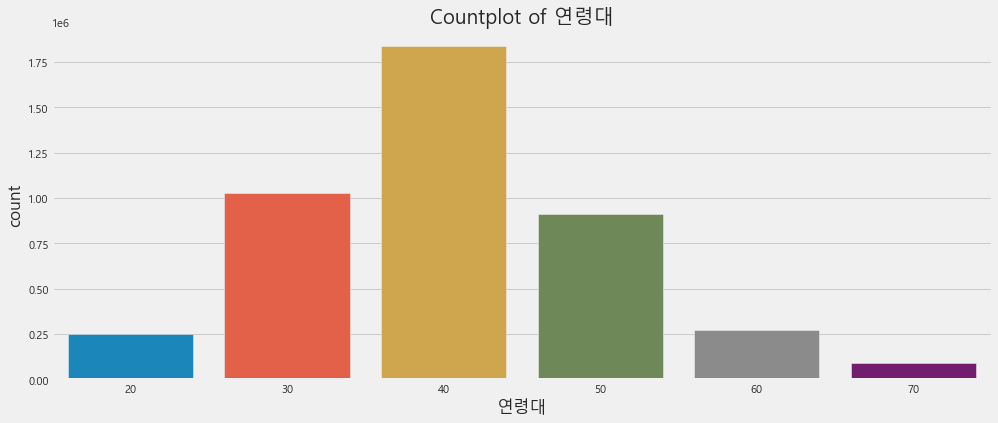

In [11]:
sns.countplot(data=df, x='연령대')
plt.title('Countplot of 연령대')

Text(0.5, 1.0, 'Distplot of Spending Score(1-100)')

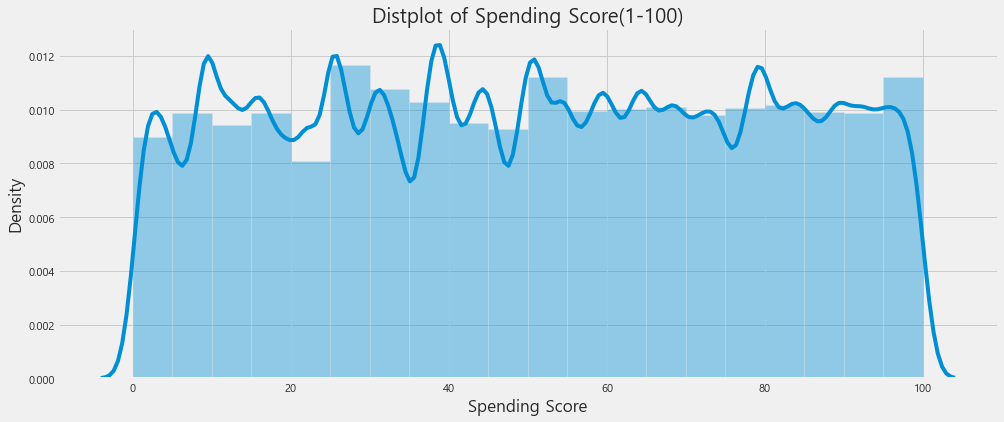

In [12]:
sns.distplot(df['Spending Score'], bins=20)
plt.title('Distplot of Spending Score(1-100)')

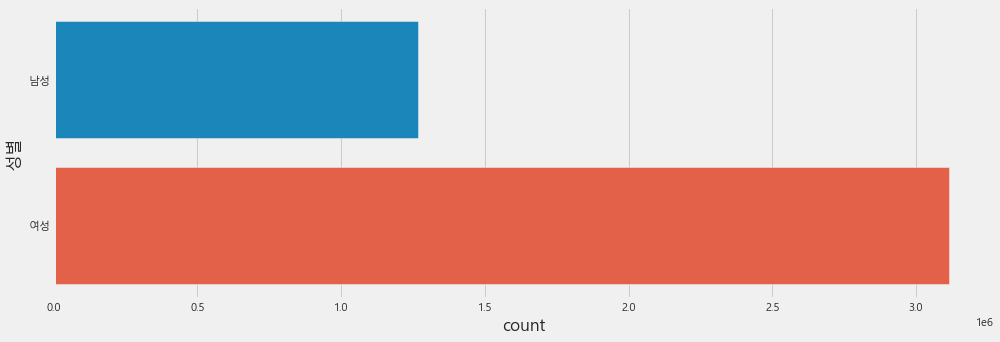

In [13]:
plt.figure(1, figsize = (15, 5))
sns.countplot(y='성별', data=df, order=['남성', '여성'])
plt.show()

### 연령대, 이용금액의 관계

<AxesSubplot:xlabel='연령대', ylabel='이용금액'>

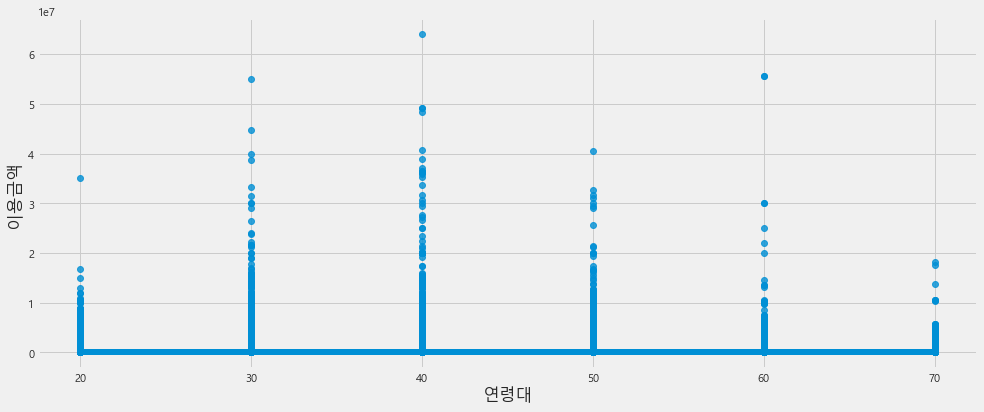

In [14]:
sns.regplot(x='연령대', y='이용금액', data=df)

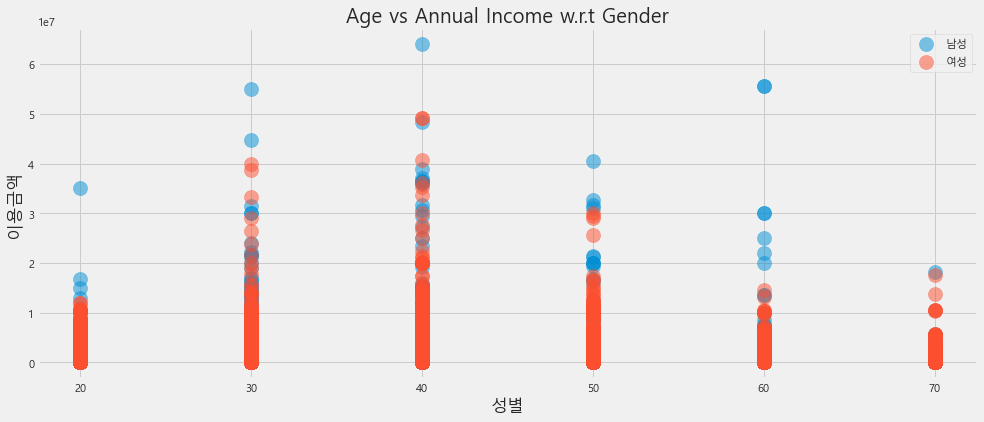

In [15]:
plt.figure(1 , figsize = (15 , 6))
for gender in ['남성' , '여성']:
    plt.scatter(x = '연령대' , y = '이용금액' , data = df[df['성별'] == gender],
                s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('성별'), plt.ylabel('이용금액') 
plt.title('Age vs Annual Income w.r.t Gender')
plt.legend()
plt.show()

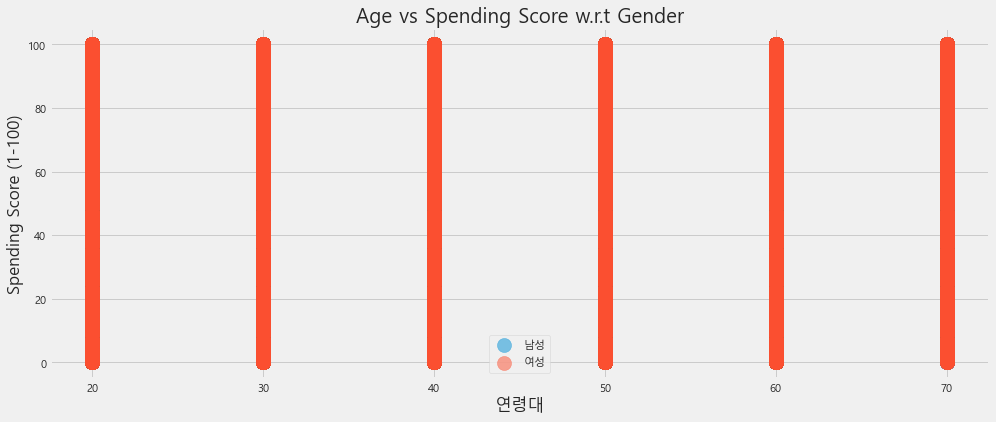

In [16]:
plt.figure(1 , figsize = (15 , 6))
for gender in ['남성' , '여성']:
    plt.scatter(x = '연령대', y = 'Spending Score' ,
                data = df[df['성별'] == gender] ,s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('연령대'), plt.ylabel('Spending Score (1-100)') 
plt.title('Age vs Spending Score w.r.t Gender')
plt.legend()
plt.show()

### Distribution of values in Age, Spending Score according to Gender

In [ ]:
plt.figure(1 , figsize = (15 , 7))
n = 0 
for cols in ['연령대' , '이용금액' , 'Spending Score']:
    n += 1 
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.violinplot(x = cols , y = '연령대' , data = df , palette = 'vlag')
    sns.swarmplot(x = cols , y = '연령대' , data = df)
    plt.ylabel('연령대' if n == 1 else '')
    plt.title('Boxplots & Swarmplots' if n == 2 else '')
plt.show()

## Clustering using K-means

## 1. Segmentation using 성별, 이용금액

In [ ]:
X1 = df[['성별' , '이용금액']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

### Selecting N Clusters based in Inertia (Squared Distance between Centroids and data points, should be less)

In [ ]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [ ]:
algorithm = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

In [ ]:
h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

In [ ]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = '성별' ,y = '이용금액' , data = df , c = labels1 , 
            s = 200 )
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('이용금액'), plt.xlabel('성별')
plt.show()

### 2. Segmentation using  연령대, Spending Score

In [ ]:
X2 = df[['연령대' , 'Spending Score']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X2)
    inertia.append(algorithm.inertia_)

In [ ]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [ ]:
algorithm = (KMeans(n_clusters = 5 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X2)
labels2 = algorithm.labels_
centroids2 = algorithm.cluster_centers_

In [ ]:
h = 0.02
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z2 = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

In [ ]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z2 = Z2.reshape(xx.shape)
plt.imshow(Z2 , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = '연령대' ,y = 'Spending Score' , data = df , c = labels2 , 
            s = 200 )
plt.scatter(x = centroids2[: , 0] , y =  centroids2[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score') , plt.xlabel('연령대')
plt.show()

### 3.Segmentation using 연령대, 이용금액